In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/cleanded_data.csv')

In [3]:
df = df.dropna()

In [4]:
df.head()

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,product_name,Product_popularity,Product_cost_range,DemandOfTheProduct
0,4.7,451.332026,3983.067091,False,400.0,Hi-Fi Speakers,Echo Dot,Popular Product,Low midrange cost,Neutral dimand
1,4.7,451.332026,9999.000000,True,500.0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth...",Popular Product,Low midrange cost,High dimand
2,4.7,451.332026,2499.000000,False,600.0,Hi-Fi Speakers,Echo Dot,Popular Product,Low cost,High dimand
3,4.7,451.332026,9999.000000,False,400.0,Hi-Fi Speakers,Echo Dot with clock,Popular Product,Low midrange cost,Neutral dimand
4,4.6,451.332026,4999.000000,False,100.0,Hi-Fi Speakers,Introducing Echo Pop,Popular Product,Low cost,Low dimand


# Model Evaluation

In [5]:
# split my data in training and pridicting columns
 
X = df.drop(columns= ['boughtInLastMonth'], axis=1)
y = df[['boughtInLastMonth']]

In [6]:
# import Train test split  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
num_col = ['stars', 'reviews', 'price']

In [8]:
obj_col = ['categoryName', 'product_name', 'Product_popularity', 'isBestSeller', 'Product_cost_range', 'DemandOfTheProduct']

# Scalling and Encoding

In [9]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pandas as pd

# Scale numeric columns
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_col]),
                           columns=num_col, index=X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_col]),
                          columns=num_col, index=X_test.index)

In [10]:

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[obj_col]),
                           columns=obj_col, index=X_train.index)

X_test_cat = pd.DataFrame(encoder.transform(X_test[obj_col]),
                          columns=obj_col, index=X_test.index)

In [11]:
# Final combined data
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

In [12]:
final_df = pd.concat([X_train_processed, y_train], axis = 1)

<Axes: >

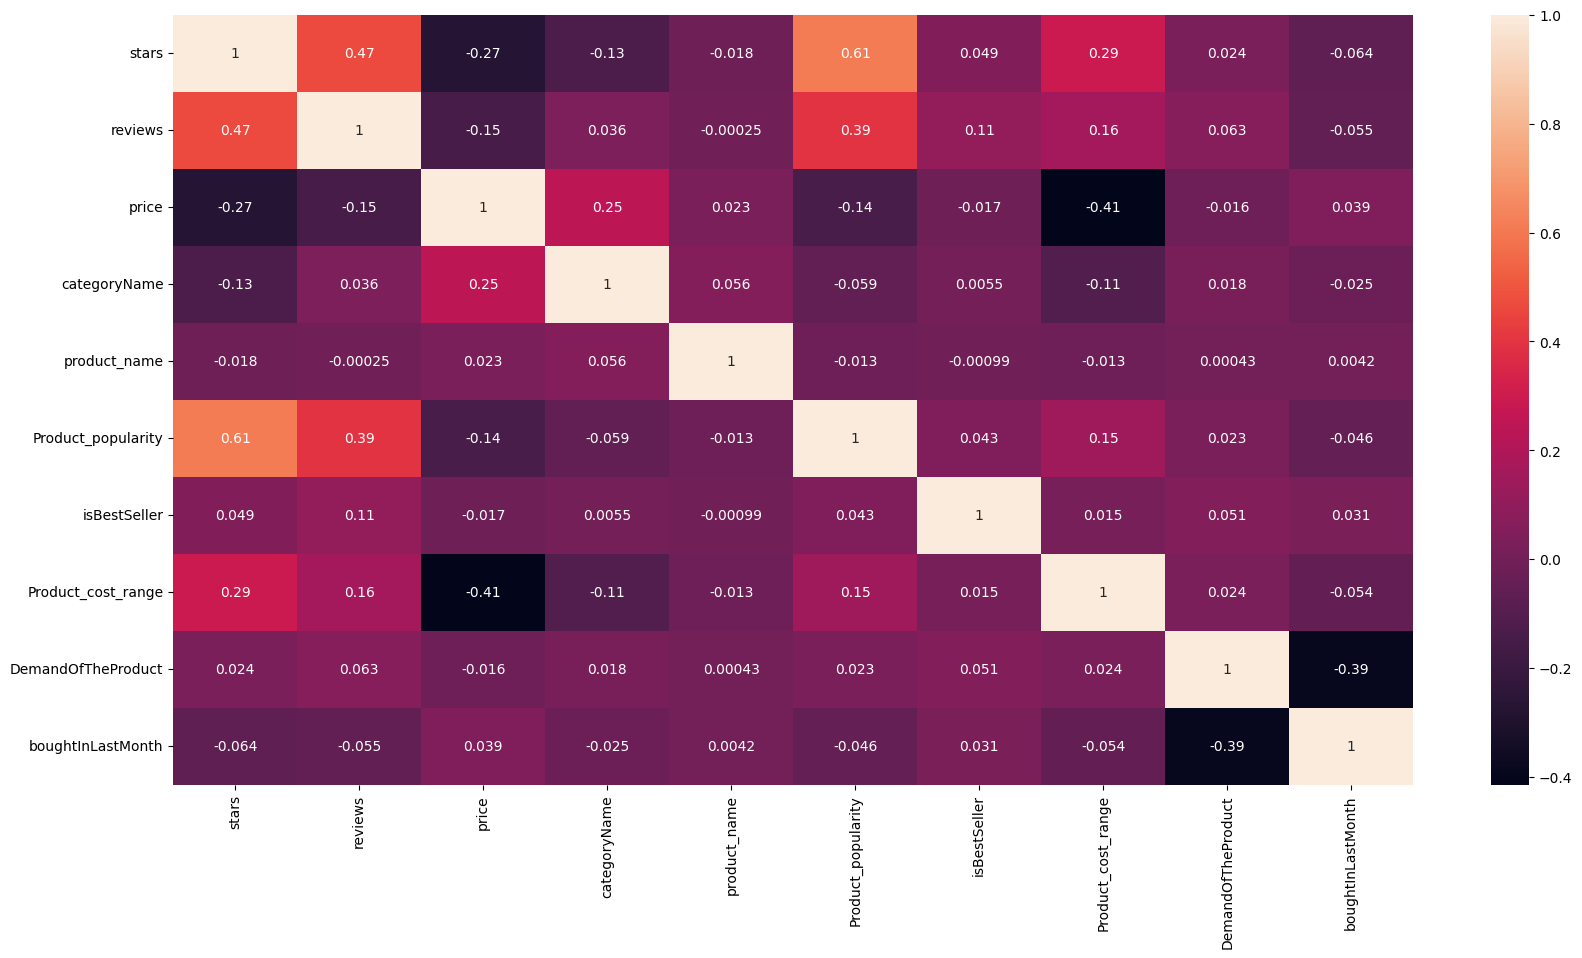

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
sns.heatmap(final_df.corr(), annot = True)

In [14]:
# import all model to test
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [15]:
# Creating Dict for my all models

models =  {
    # "Linear Regression": LinearRegression(),
    # "Decision Tree Regressor": DecisionTreeRegressor(),
    # "Random Forest Regressor": RandomForestRegressor(),
    # "XGB Regressor": XGBRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

In [16]:
# importing required library

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Create a loop for easy task for test my all model
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - ( (1 - r2) * (n - 1) / (n - p - 1) )
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f} , Adjested_R2 : {adj_r2: .2f}")

    # scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    # print(f"{model} Cross-validated R² scores is :", scores)
    # print("Mean CV R²:", scores.mean())

GradientBoostingRegressor - MSE: 5035.20, MAE: 52.62, R2 Score: 0.85 , Adjested_R2 :  0.85


# Create a pipeline

In [2]:
import pandas as pd
import numpy as np 
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('../Data/Cleanded_data.csv')

Target_col = 'boughtInLastMonth'
num_col = ['stars','reviews','price']
obj_col = ['categoryName','isBestSeller', 'Product_popularity', 'Product_cost_range','DemandOfTheProduct']

X = df[num_col + obj_col]
y = df[Target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_col),
    ('cat', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), obj_col)
])

pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score is", r2)

with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
print("Full pipeline saved successfully!")


r2 score is 0.8660282169672882
Full pipeline saved successfully!
